<a href="https://colab.research.google.com/github/romelgo/Prediccion-de-la-perdida-de-clientes-mediante-Machine-Learning/blob/main/EDA_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Análisis exploratorio

## Paso 1: Importar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

## Paso 2: Lectura del conjunto de datos

In [48]:
df = pd.read_csv('/content/cars_data.csv')
display(df.head())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Paso 3: Análisis de los datos

1. *`df.shape():`* Esta función se utiliza para comprender el número de filas (observaciones) y columnas (características) del conjunto de datos.
Esto proporciona una visión general del tamaño y la estructura del conjunto de datos.

In [49]:
df.shape

(7253, 14)

`2. df.info():` esta función nos ayuda a comprender el conjunto de datos mostrando la cantidad de registros en cada columna, el tipo de datos,
si faltan valores y cuánta memoria utiliza el conjunto de datos.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


***`3. df.describe().T :`*** Este método proporciona un resumen estadístico del DataFrame (Transposición), mostrando valores como el recuento, la
media, la desviación estándar, el mínimo y los cuartiles para cada columna numérica. Ayuda a resumir la tendencia central y la dispersión de
los datos.

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


***`4. df.columns.tolist():`*** Esto convierte los nombres de las columnas del DataFrame en una lista de Python, lo que facilita el acceso y la
manipulación de los nombres de las columnas.

In [52]:
df.columns.tolist()

['S.No.',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

## Paso 4: Comprobación de valores faltantes

***`df.isnull().sum():`*** Esto verifica si hay valores faltantes en cada columna y devuelve el número total de
valores nulos por columna, lo que nos ayuda a identificar cualquier brecha en nuestros datos.

In [53]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


### Interpretacion:
1. **`New_Price`** → 6247 valores nulos (muy alto)
- Esto es normal, ya que muchos autos usados no tienen precio nuevo
- **Recomendación:**
Ignoraremos esta columna para futuros modelos predictivos |  predicción de `Price`
2. **`Price`** → 1234 valores nulos
- El precio final es lo que queremos predecir
- **Recomendación**:
Dado que se realizará una predicción de precios en el futuro, se deben eliminar las filas que contienen valores nulos en la columna **`Price`**.

3. **`Seats`** → 53 nulos
- Es una variable discreta (número de asientos), típicamente entre 4 y 7.
- Vamos a imputar con la moda (**valor más común**), por ejemplo, 5.

4. **`Engine`** y **`Power`** → 46 nulos cada uno
- Estas son variables numéricas importantes (motor y potencia).

-  Vamos a calcular la **mediana** específica de las columnas **`'Engine' y 'Power'`**. Para cada grupo de vehículos con el mismo tipo de combustible.

- Luego, los valores nulos dentro de cada grupo se reemplazan con esa mediana particular.
5. Mileage → 2 nulos
- Muy pocos. Puedes imputar fácilmente.
- Usa mediana o moda por **`Fuel_Type`**.

In [54]:
# 1. Eliminar New_Price, no se alinia conn nuestro objetivo futuro
df = df.drop(columns=['New_Price'])

In [55]:
# 2. Eliminar filas con Price nulo
df = df.dropna(subset=['Price'])

In [56]:
# 3. Vamos a imputar con la moda
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])

In [57]:
# 4.  mediana: por tipo de combustible
 #  paso 1: Convertir a string, eliminar ' CC' y convertir a numérico
df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = df['Power'].astype(str).str.replace(' bhp', '')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
# imputar valores nulos
df['Engine'] = df.groupby('Fuel_Type')['Engine'].transform(lambda x: x.fillna(x.median()))
df['Power'] = df.groupby('Fuel_Type')['Power'].transform(lambda x: x.fillna(x.median()))

In [58]:
# 5.- Imputar con mediana calculada por cada grupo definido según el tipo de combustible
  # Paso 1: eliminar la unidad y convertir a número
df['Mileage'] = df['Mileage'].astype(str).str.replace(' km/kg', '', regex=False)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
# Imputar con mediana
df['Mileage'] = df.groupby('Fuel_Type')['Mileage'].transform(lambda x: x.fillna(x.median()))
# Si quedan NaN, rellenar con mediana global
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())

In [59]:
# Verificar que ya no hay nulos
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


## Paso 5: Comprobación de valores duplicados

***`df.nunique():`*** esta función nos dice cuántos valores únicos existen en cada columna, lo
que proporciona información sobre la variedad de datos en cada característica.

In [60]:
df.nunique()

,0
S.No.,6019
Name,1876
Location,11
Year,22
Kilometers_Driven,3093
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,24
Engine,146


## Paso 6: Análisis univariado

### 1. Gráfico de barras para evaluar conteo de autos por calidad (en este caso, por `Owner_Type` y `Fuel_Type`)




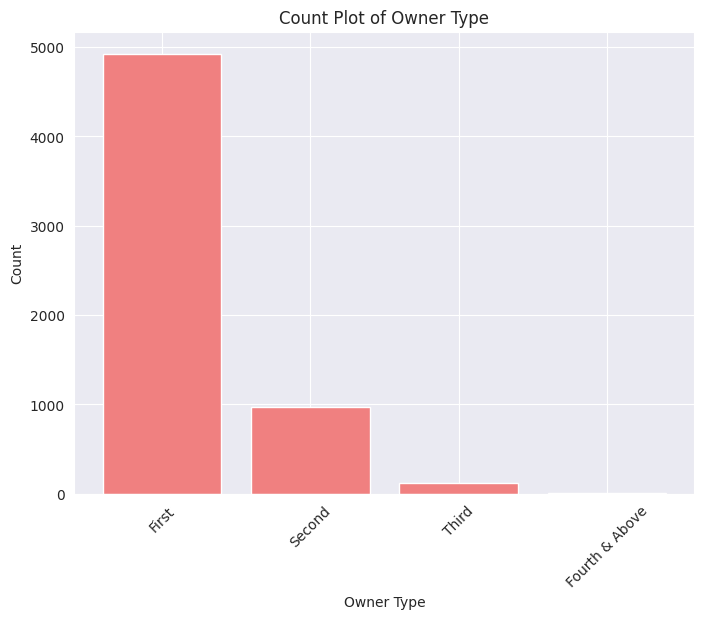

In [61]:
# Tipo de propietario
owner_counts = df['Owner_Type'].value_counts()
plt.bar(owner_counts.index, owner_counts, color='lightcoral')
plt.title('Count Plot of Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

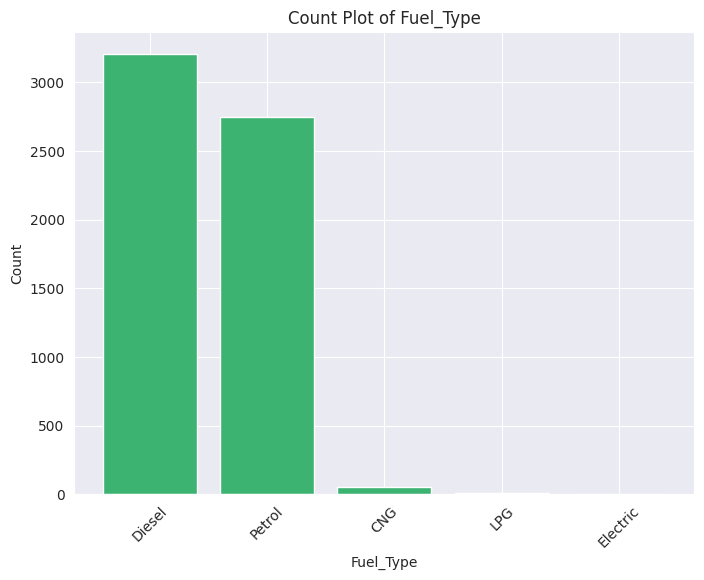

In [65]:
# Tipo de combustible
plt.figure(figsize=(8,6))
owner_counts = df['Fuel_Type'].value_counts()
plt.bar(owner_counts.index, owner_counts, color='mediumseagreen')
plt.title('Count Plot of Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2.- Gráfico de densidad kernel (Histograma): Para comprender la varianza de los datos numéricos

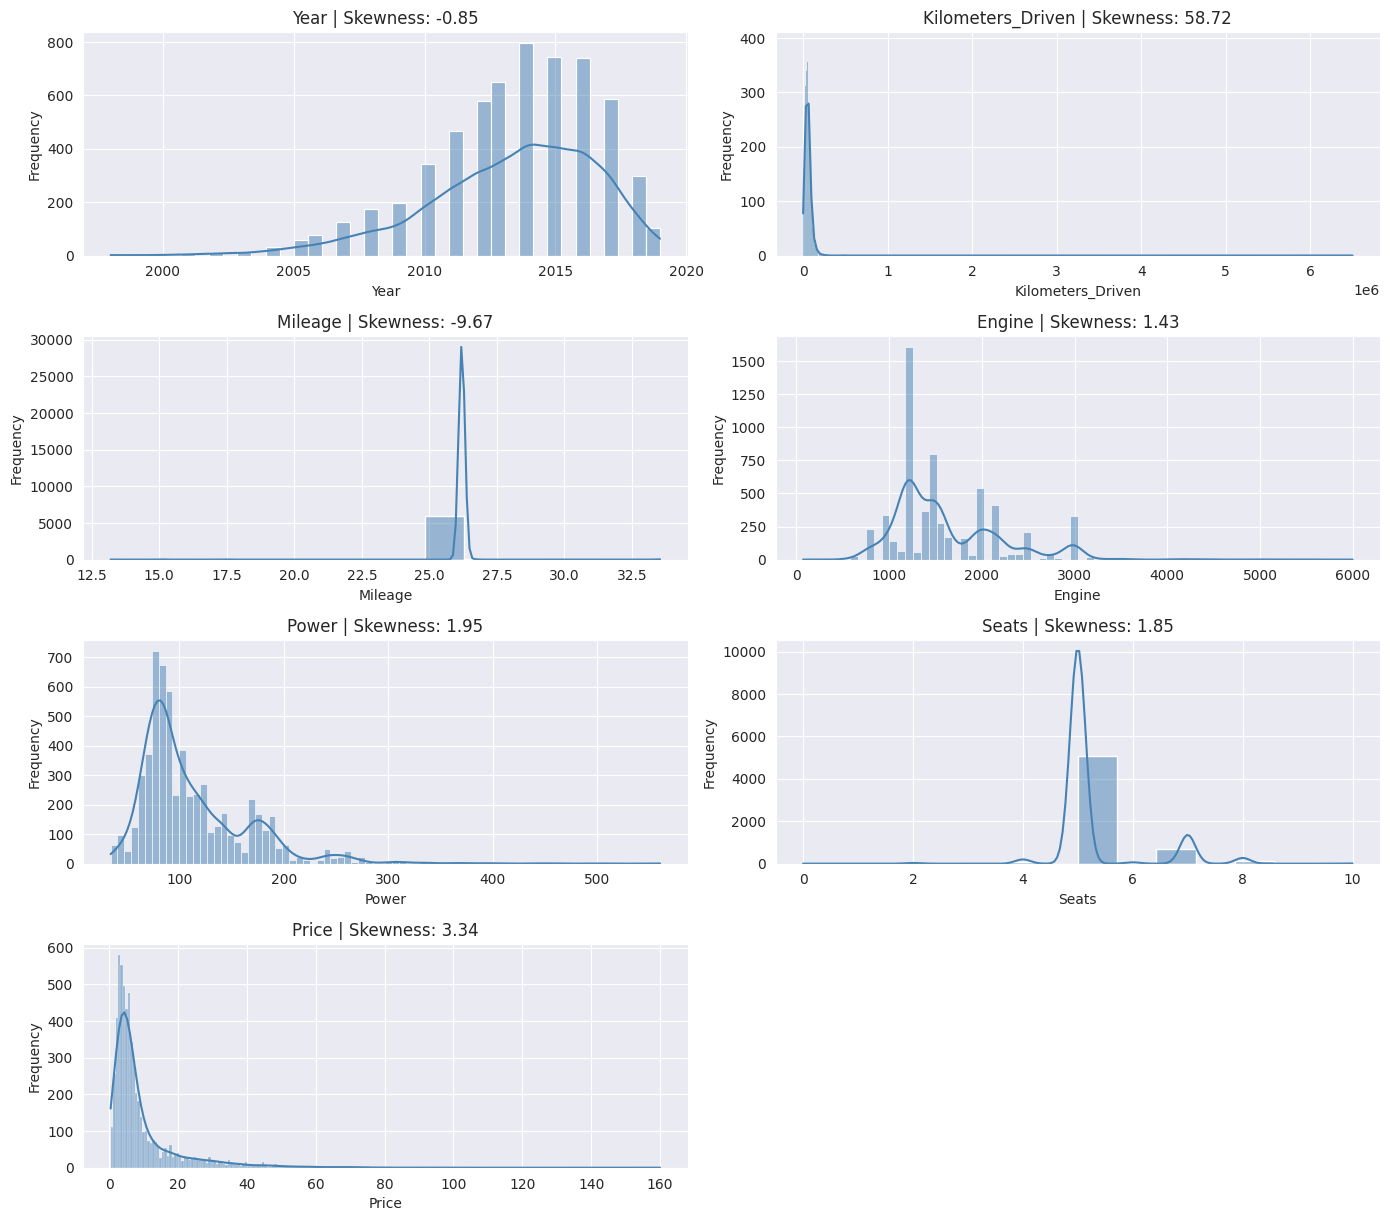

In [68]:
# Seleccionar solo columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Quitamos S.No. si no es relevante
if 'S.No.' in numerical_columns:
    numerical_columns.remove('S.No.')

plt.figure(figsize=(14, len(numerical_columns) * 3))

for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True, color='steelblue')
    skewness = round(df[feature].skew(), 2)
    plt.title(f"{feature} | Skewness: {skewness}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3. Gráfico de enjambre (Swarm plot): Para identificar valores atípicos, o punts aislados que se alejan de los grupos principales de datos

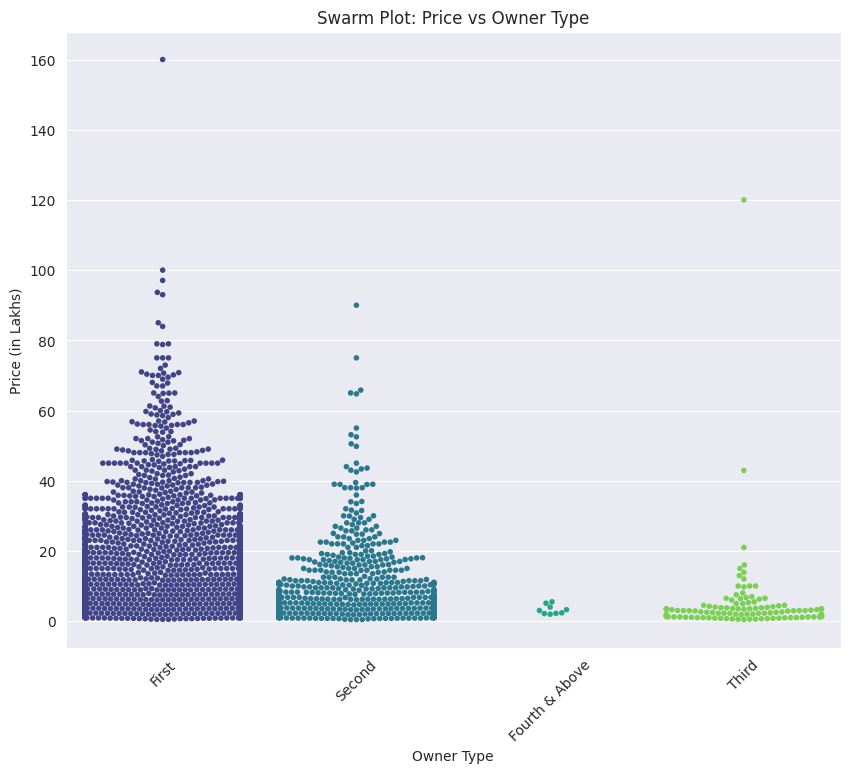

In [69]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x="Owner_Type", y="Price", data=df, palette="viridis", size=4)
plt.title('Swarm Plot: Price vs Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

# Paso 7: Análisis bivariado

### 1. Gráfico de pares (Pair Plot): Muestra la distribución de las variables individuales y la relación entre pares de variables

<Figure size 1200x1000 with 0 Axes>

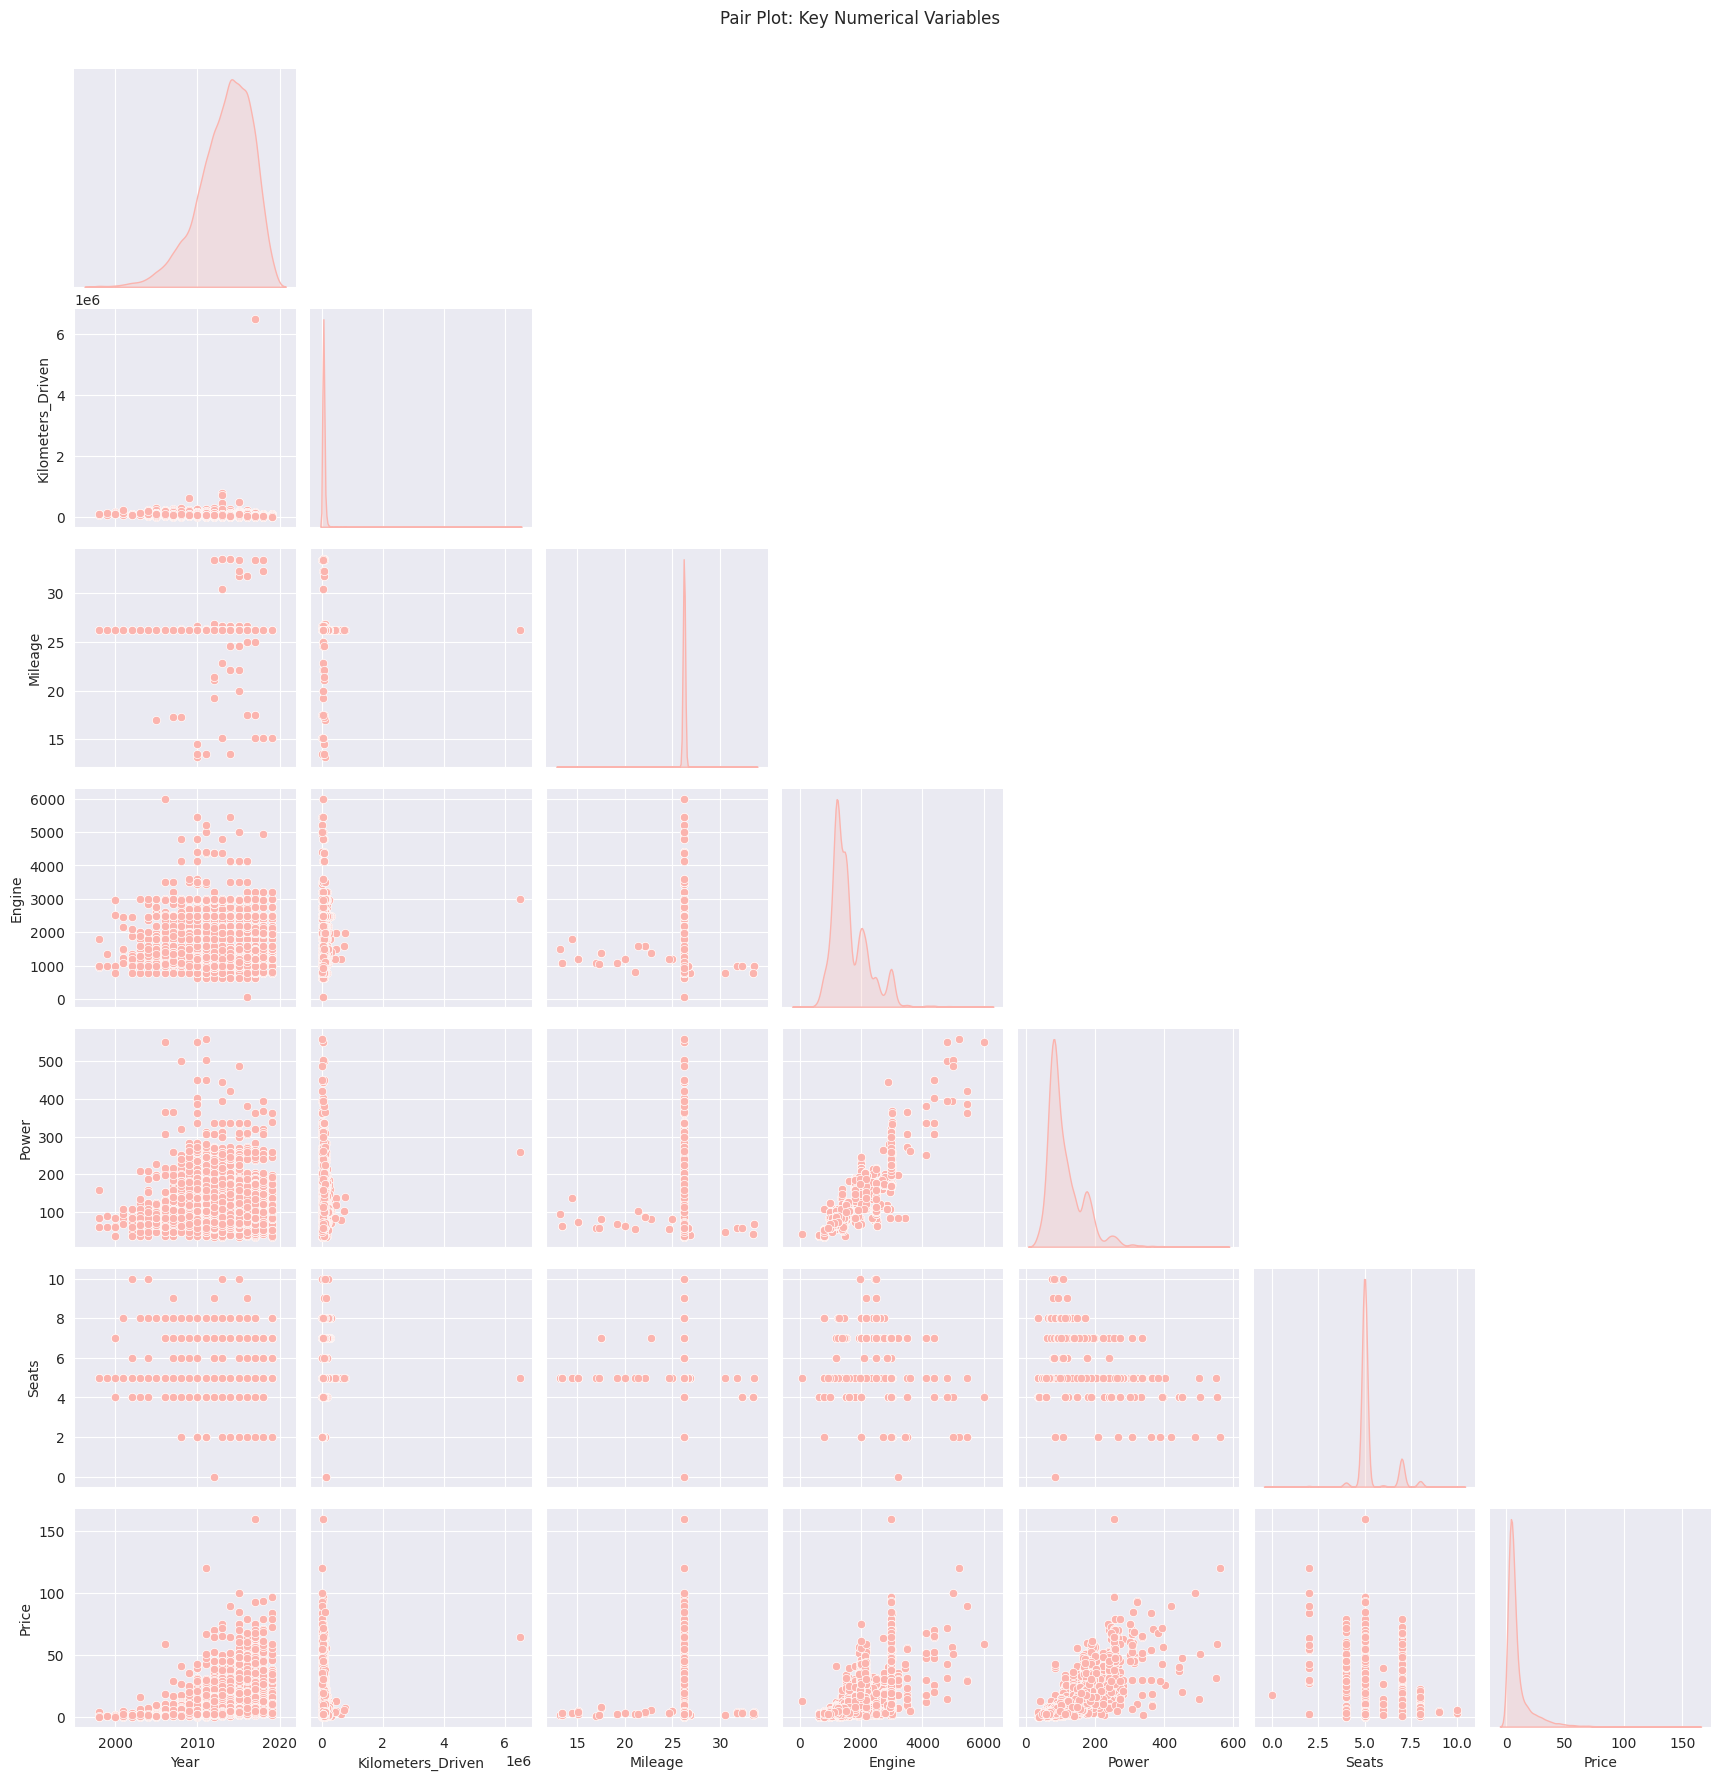

In [75]:
# Seleccionar solo las más relevantes para no saturar
key_numerical = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

sns.set_palette("Pastel1")
plt.figure(figsize=(12, 10))
sns.pairplot(df[key_numerical], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot: Key Numerical Variables', y=1.02)
plt.show()

### 2. Diagrama de violín para examinar la relación entre el `Price` y `Owner_Type`

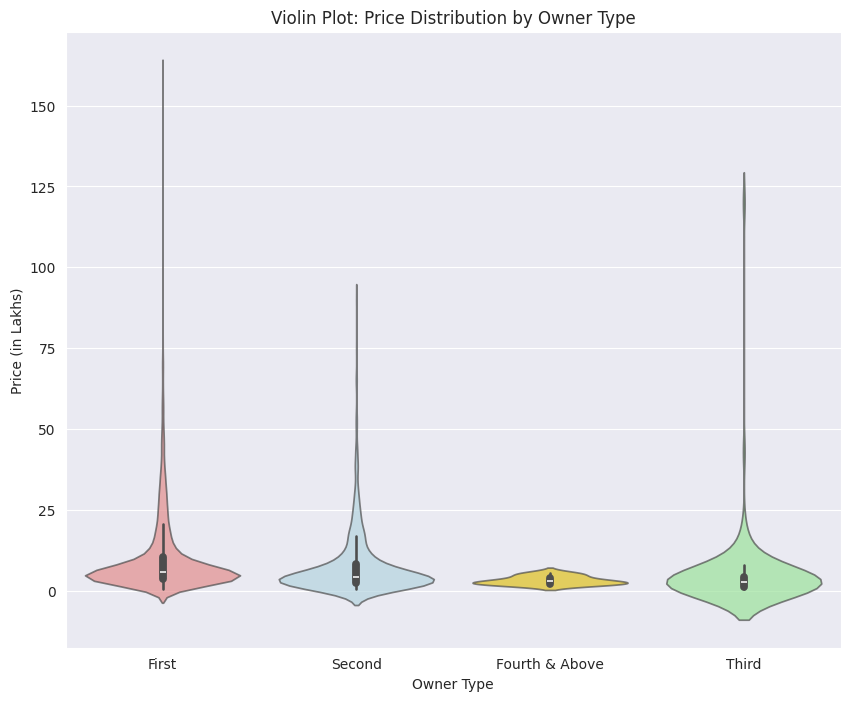

In [74]:
# Convertir a string para evitar problemas en seaborn
df['Owner_Type'] = df['Owner_Type'].astype(str)

plt.figure(figsize=(10, 8))
sns.violinplot(x="Owner_Type", y="Price", data=df, palette={
    'First': 'lightcoral',
    'Second': 'lightblue',
    'Third': 'lightgreen',
    'Fourth & Above': 'gold'
}, alpha=0.7)

plt.title('Violin Plot: Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

### 3. Diagrama de caja (Box Plot):  Relación entre `Price` y `Transmission`

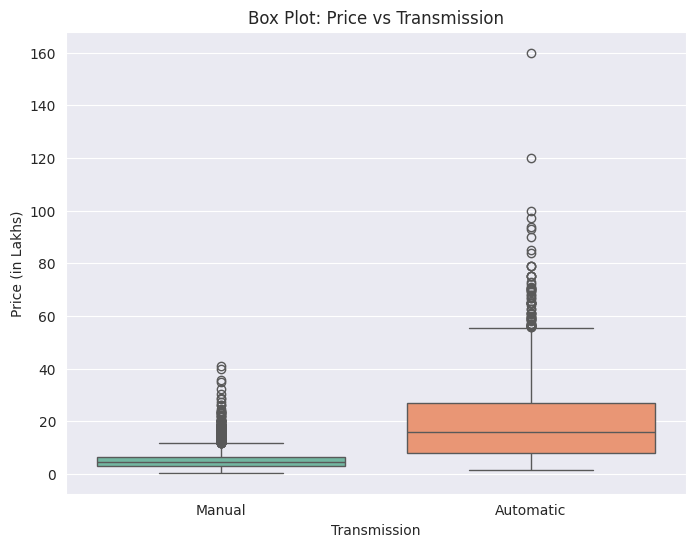

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Set2")

plt.title('Box Plot: Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price (in Lakhs)')
plt.show()

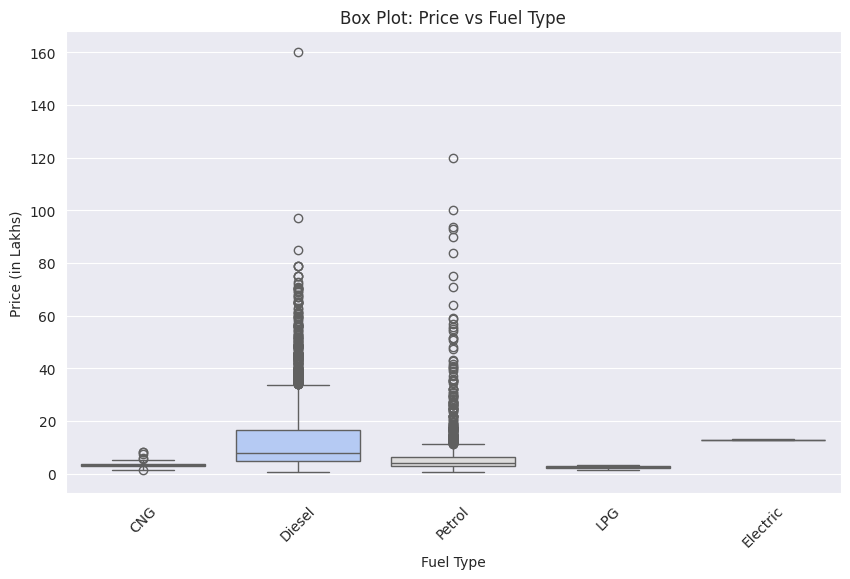

In [83]:
# Box Plot: Price vs Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fuel_Type", y="Price", data=df, palette="coolwarm")
plt.title('Box Plot: Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

## Paso 8: Análisis multivariado

El análisis multivariado examina las interacciones entre tres o más variables. La guía utiliza un mapa de calor de correlación para mostrar estas relaciones.


Mapa de calor de correlación (Correlation Heatmap): Visualiza la fuerza de la correlación entre las variables. Los valores cerca de +1 o -1 indican una correlación fuerte (positiva o negativa, respectivamente), mientras que los valores cerca de 0 sugieren que no hay una correlación lineal.

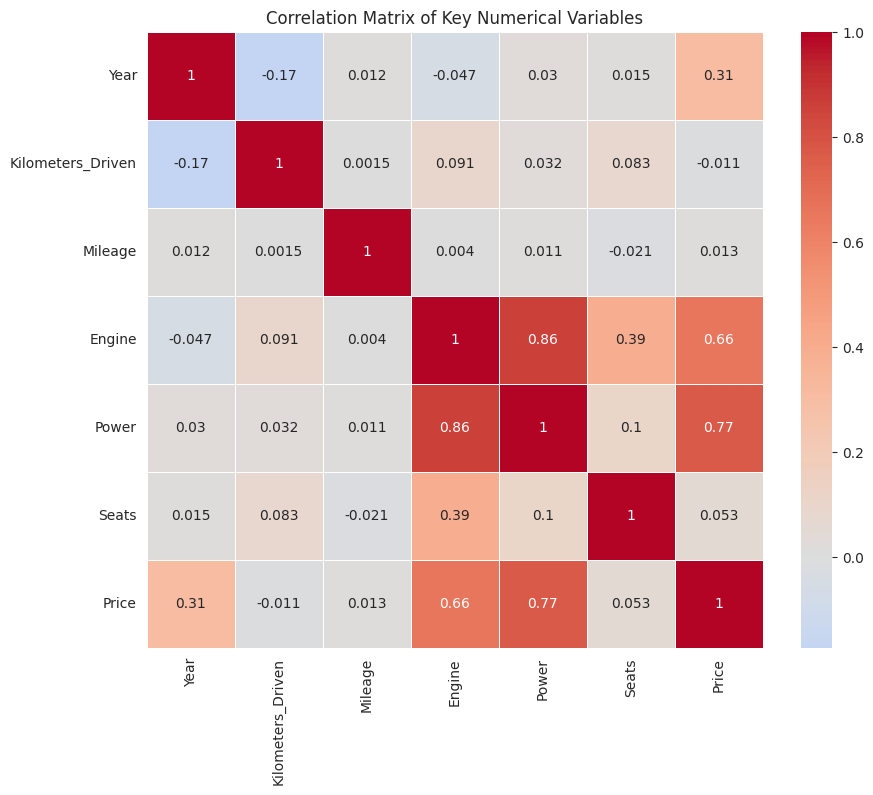

In [84]:
plt.figure(figsize=(10, 8))
corr_matrix = df[key_numerical].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()
